In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Creating an empty DataFrame to store the concatenated data
combined_data = pd.DataFrame()

for stock in tech_list:
    tickerData = yf.Ticker(stock)
    tickerDf = tickerData.history(period='1d', start=start, end=end)
    tickerDf['company_name'] = stock
    combined_data = pd.concat([combined_data, tickerDf])

# Display the last 10 entries
combined_data.tail(10)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2025-01-06 00:00:00-05:00,226.779999,228.839996,224.839996,227.610001,31849800,0.0,0.0,AMZN
2025-01-07 00:00:00-05:00,227.899994,228.380005,221.460007,222.110001,28084200,0.0,0.0,AMZN
2025-01-08 00:00:00-05:00,223.190002,223.520004,220.199997,222.130005,25033300,0.0,0.0,AMZN
2025-01-10 00:00:00-05:00,221.460007,221.710007,216.500000,218.940002,36811500,0.0,0.0,AMZN
2025-01-13 00:00:00-05:00,218.059998,219.399994,216.470001,218.460007,27262700,0.0,0.0,AMZN
2025-01-14 00:00:00-05:00,220.440002,221.820007,216.199997,217.759995,24711700,0.0,0.0,AMZN
2025-01-15 00:00:00-05:00,222.830002,223.570007,220.750000,223.350006,31291300,0.0,0.0,AMZN
2025-01-16 00:00:00-05:00,224.419998,224.649994,220.309998,220.660004,24757300,0.0,0.0,AMZN
2025-01-17 00:00:00-05:00,225.839996,226.509995,223.080002,225.940002,42108900,0.0,0.0,AMZN


In [4]:
# Filter the data for Apple
apple_data = combined_data[combined_data['company_name'] == 'AAPL']

# Use the describe() method to get the summary statistics for Apple's stock data
apple_summary = apple_data.describe()

# Display the summary statistics
print(apple_summary)


             Open        High         Low       Close        Volume  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean   209.221078  211.161398  207.370356  209.357558  5.669879e+07   
std     25.885205   26.091457   25.617897   25.994148  3.087979e+07   
min    164.753849  165.800067  163.488440  164.405121  2.323470e+07   
25%    185.061146  186.256828  182.886129  184.658409  4.123235e+07   
50%    218.656050  221.026826  216.471840  218.306854  4.970140e+07   
75%    228.426350  229.925303  226.269591  228.269997  6.213930e+07   
max    258.190002  260.100006  257.630005  259.019989  3.186799e+08   

        Dividends  Stock Splits  
count  251.000000         251.0  
mean     0.003944           0.0  
std      0.031061           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max      0.250000           0.0  


In [5]:
apple_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          8 non-null      float64
 1   High          8 non-null      float64
 2   Low           8 non-null      float64
 3   Close         8 non-null      float64
 4   Volume        8 non-null      float64
 5   Dividends     8 non-null      float64
 6   Stock Splits  8 non-null      float64
dtypes: float64(7)
memory usage: 512.0+ bytes


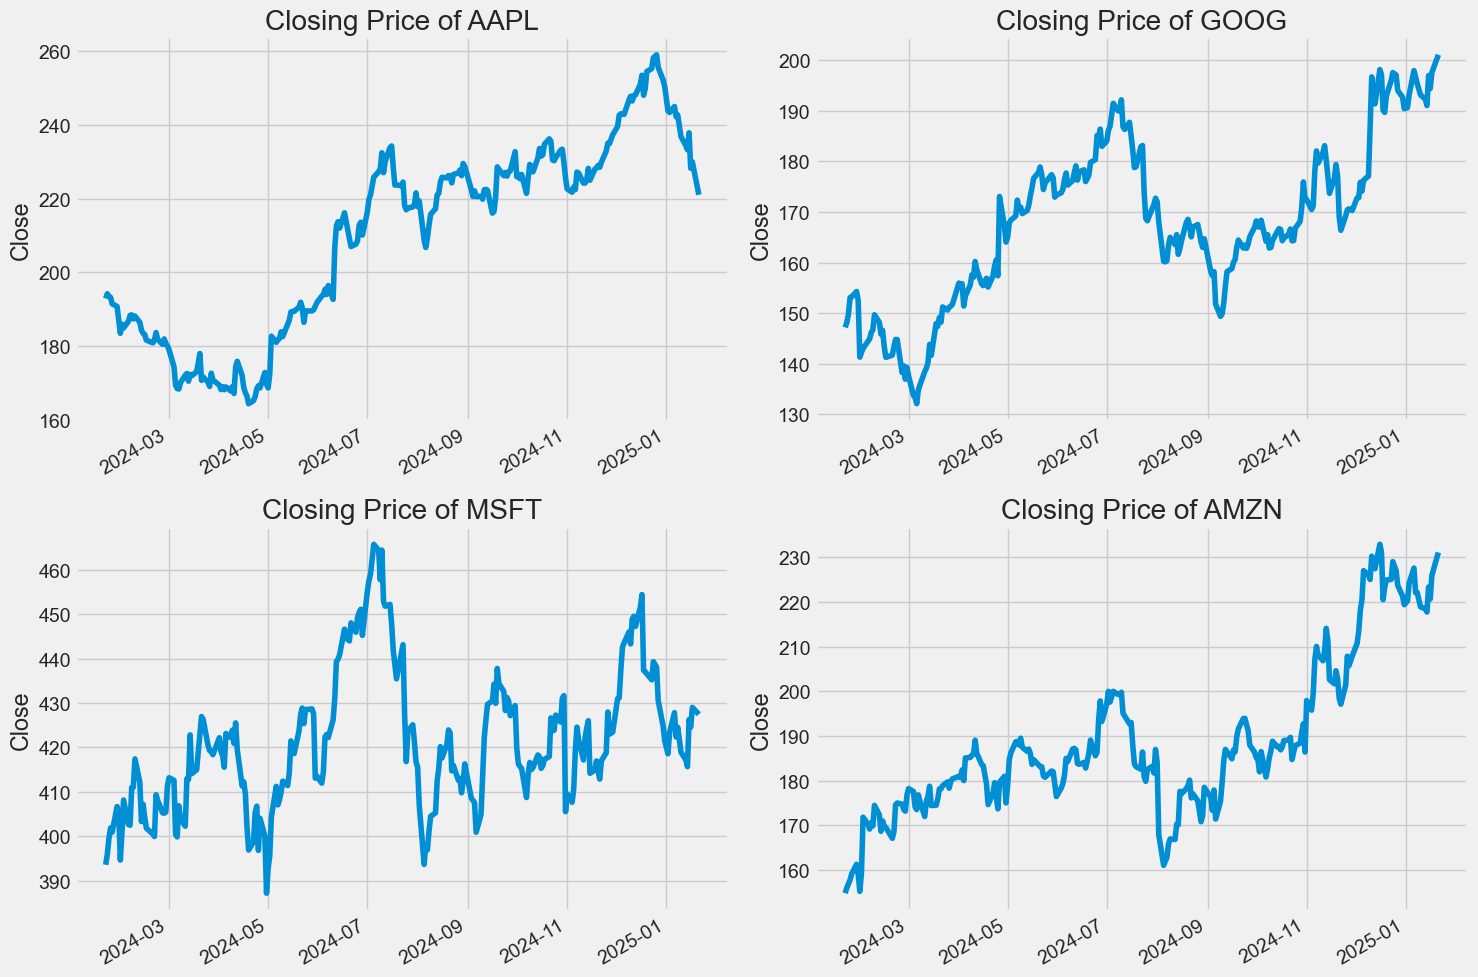

In [6]:
# Create a figure and adjust its layout
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through each company in the tech list
for i, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    # Filter data for the company and plot the 'Close' values
    filtered_data = combined_data[combined_data['company_name'] == company]
    filtered_data['Close'].plot()  
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")

plt.tight_layout()



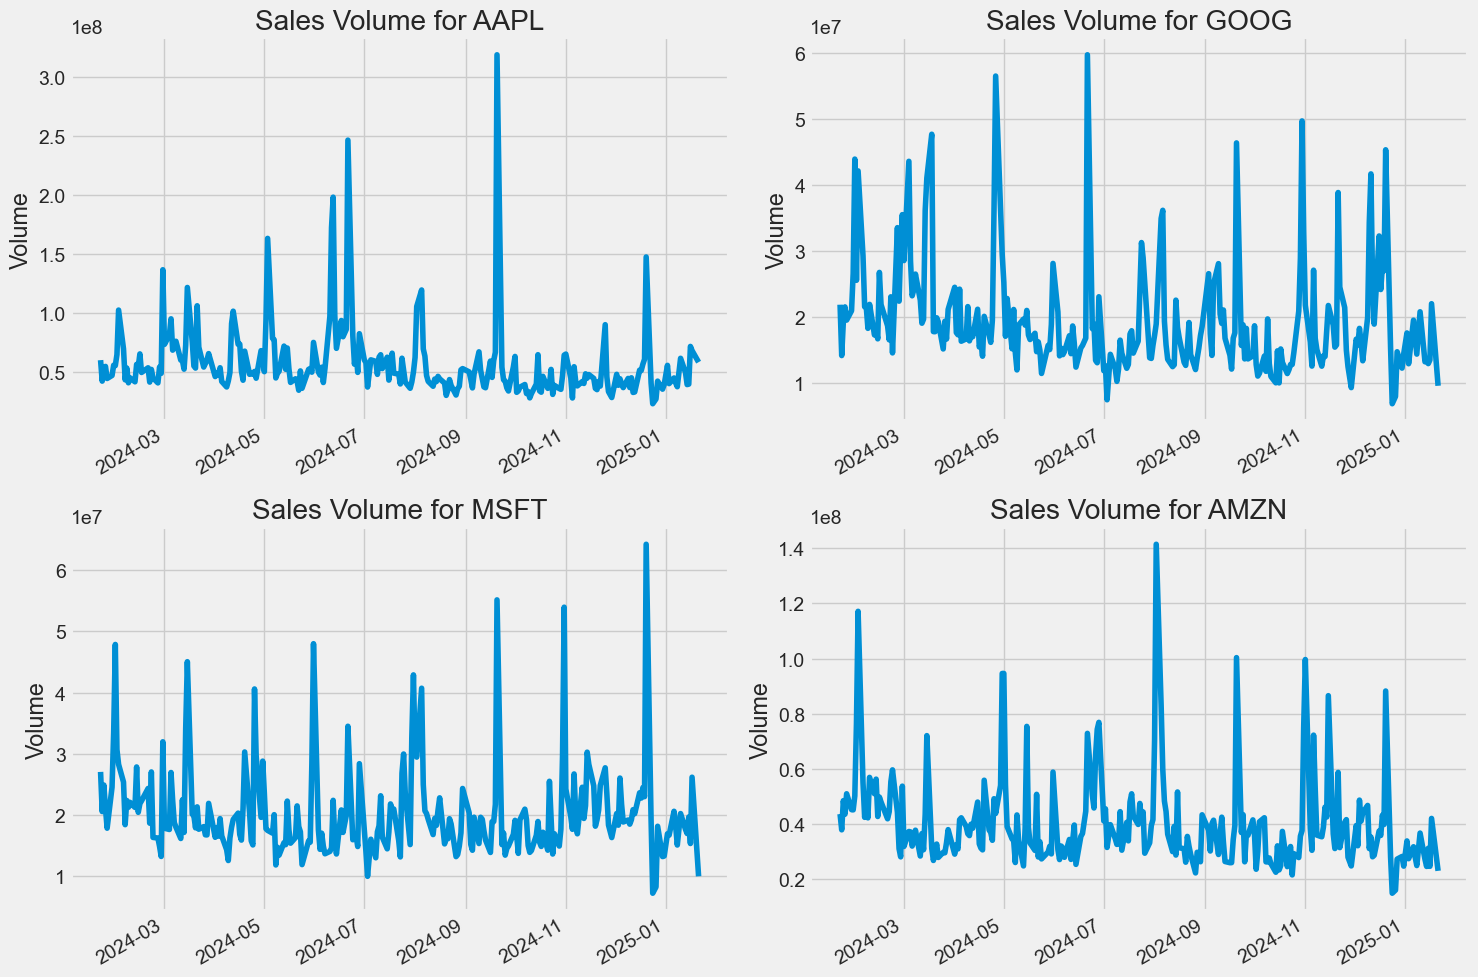

In [7]:
# Create a figure and adjust its layout
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through each company in the tech list
for i, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    # Filter data for the company and plot the 'Volume' values
    filtered_data = combined_data[combined_data['company_name'] == company]
    filtered_data['Volume'].plot()  # Ensure 'Volume' is the column name in your DataFrame
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company}")

plt.tight_layout()

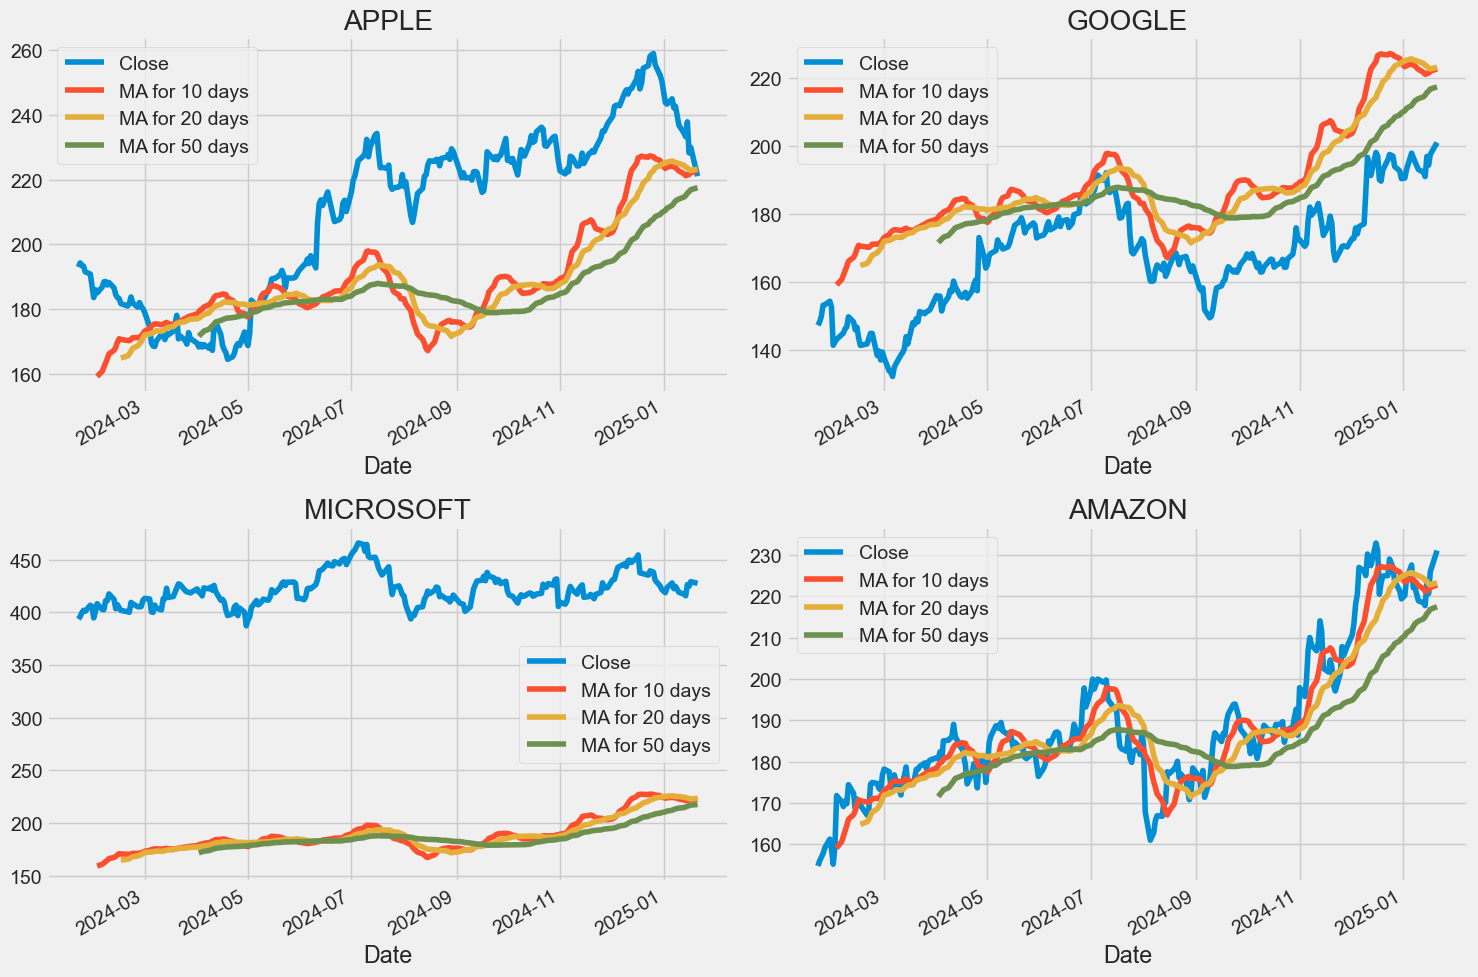

In [8]:
# Define moving average days
ma_day = [10, 20, 50]

# Calculate moving averages and add them to the DataFrame
for ma in ma_day:
    column_name = f"MA for {ma} days"
    for company in tech_list:
        # Filter data for the company
        filtered_data = combined_data[combined_data['company_name'] == company]
        # Calculate moving average and assign back to combined_data
        combined_data.loc[filtered_data.index, column_name] = filtered_data['Close'].rolling(window=ma).mean()

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# A dictionary to map company names to subplot titles
company_titles = {'AAPL': 'APPLE', 'GOOG': 'GOOGLE', 'MSFT': 'MICROSOFT', 'AMZN': 'AMAZON'}

# Loop through each subplot and assign the correct data
for i, (ax, company) in enumerate(zip(axes.flat, tech_list)):
    # Filter data
    data_to_plot = combined_data[combined_data['company_name'] == company]
    # Plot data
    data_to_plot[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    # Set title
    ax.set_title(company_titles[company])

fig.tight_layout()


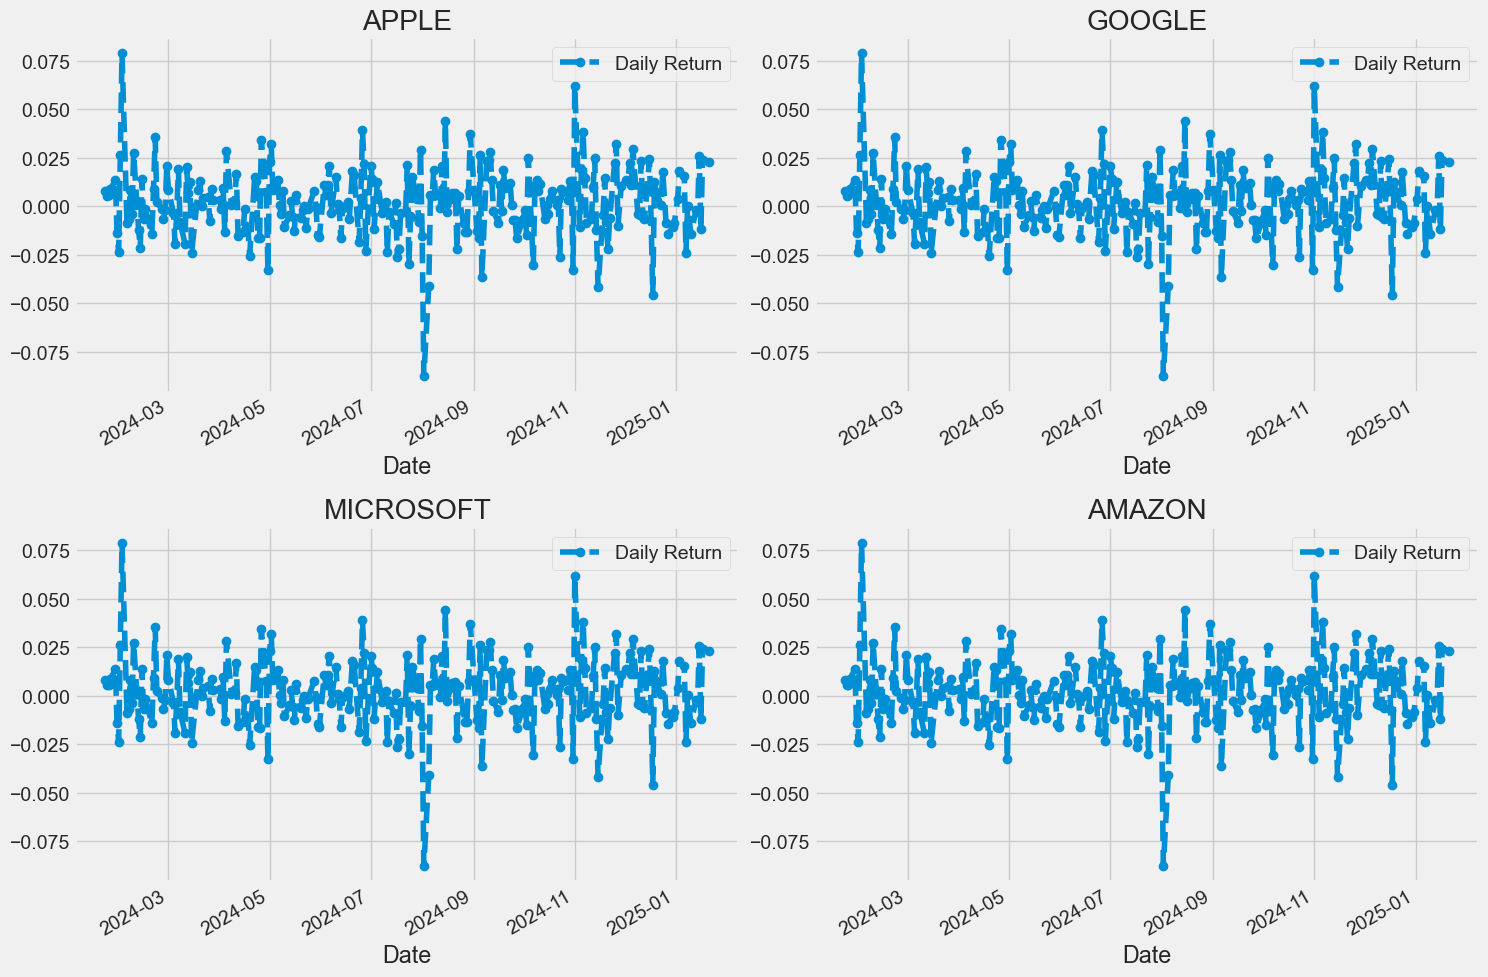

In [9]:
# Calculate the percent change for each day
for company in tech_list:
    # Filter data for the company
    filtered_data = combined_data[combined_data['company_name'] == company]
    # Calculate percent change and store it in the combined_data DataFrame
    combined_data.loc[filtered_data.index, 'Daily Return'] = filtered_data['Close'].pct_change()

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# A dictionary to map company names to subplot titles
company_titles = {'AAPL': 'APPLE', 'GOOG': 'GOOGLE', 'MSFT': 'MICROSOFT', 'AMZN': 'AMAZON'}

# Loop through each subplot and assign the correct data
for i, (ax, company) in enumerate(zip(axes.flat, tech_list)):
    # Filter data
    data_to_plot = combined_data[combined_data['company_name'] == company]
    # Plot daily return
    data_to_plot['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    # Set title
    ax.set_title(company_titles[company])

fig.tight_layout()

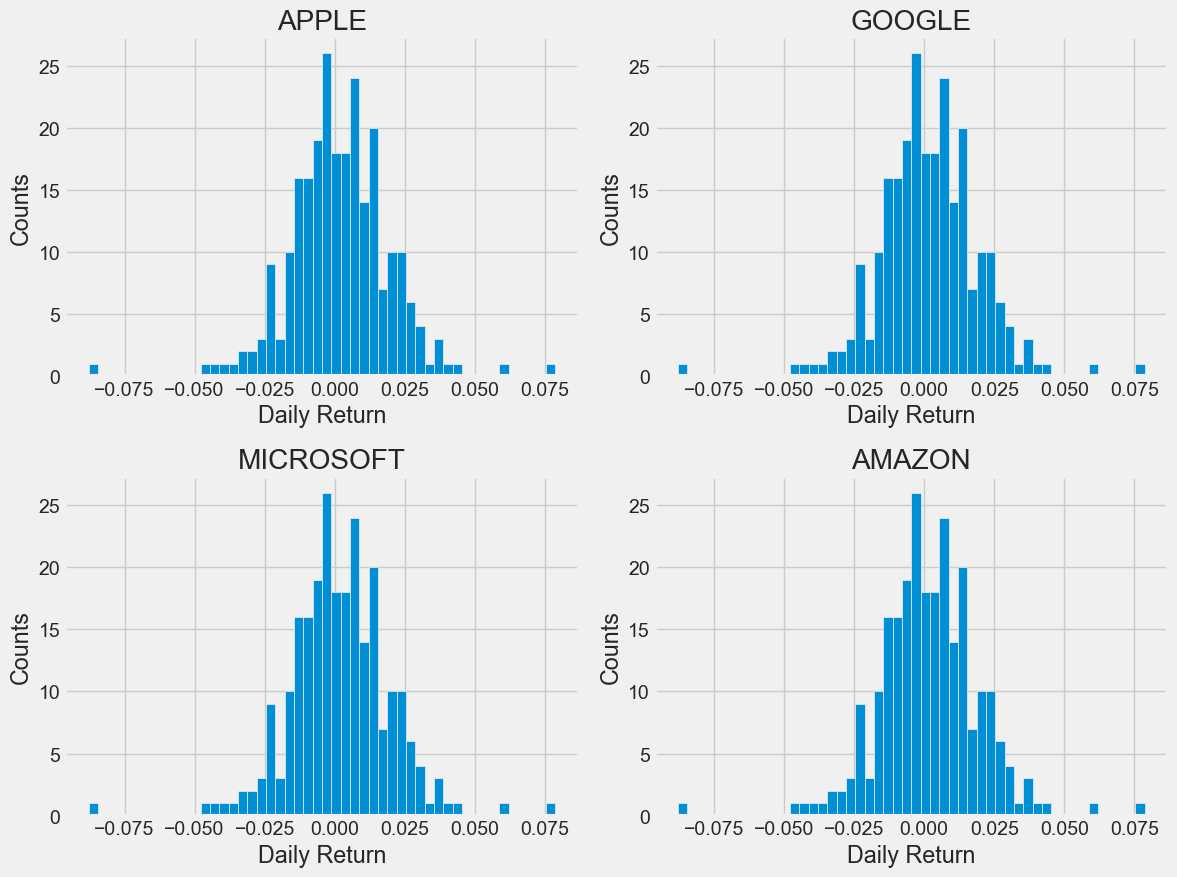

In [10]:
# Set up the figure size
plt.figure(figsize=(12, 9))

# Company names to be used in titles
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Loop through each company and create a subplot for their daily return histogram
for i, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    # Filter data for the company
    filtered_data = combined_data[combined_data['company_name'] == company]
    # Plot histogram of 'Daily Return'
    filtered_data['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_names[i - 1]}')  # Using names from the predefined list

plt.tight_layout()

In [11]:
## Define the tech stocks and time period
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start = datetime(end.year - 1, end.month, end.day)
end = datetime.now()

# Fetch the historical data
data = yf.download(tech_list, start=start, end=end)

closing_df = data['Close']

# Calculate the percentage change for returns
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns data
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-01-22,NaN,NaN,NaN,NaN
2024-01-23,0.006653,0.008011,0.006567,0.006028
2024-01-24,-0.003484,0.005448,0.011232,0.009175
2024-01-25,-0.001697,0.005610,0.021882,0.005738
2024-01-26,-0.009013,0.008685,0.000976,-0.002322


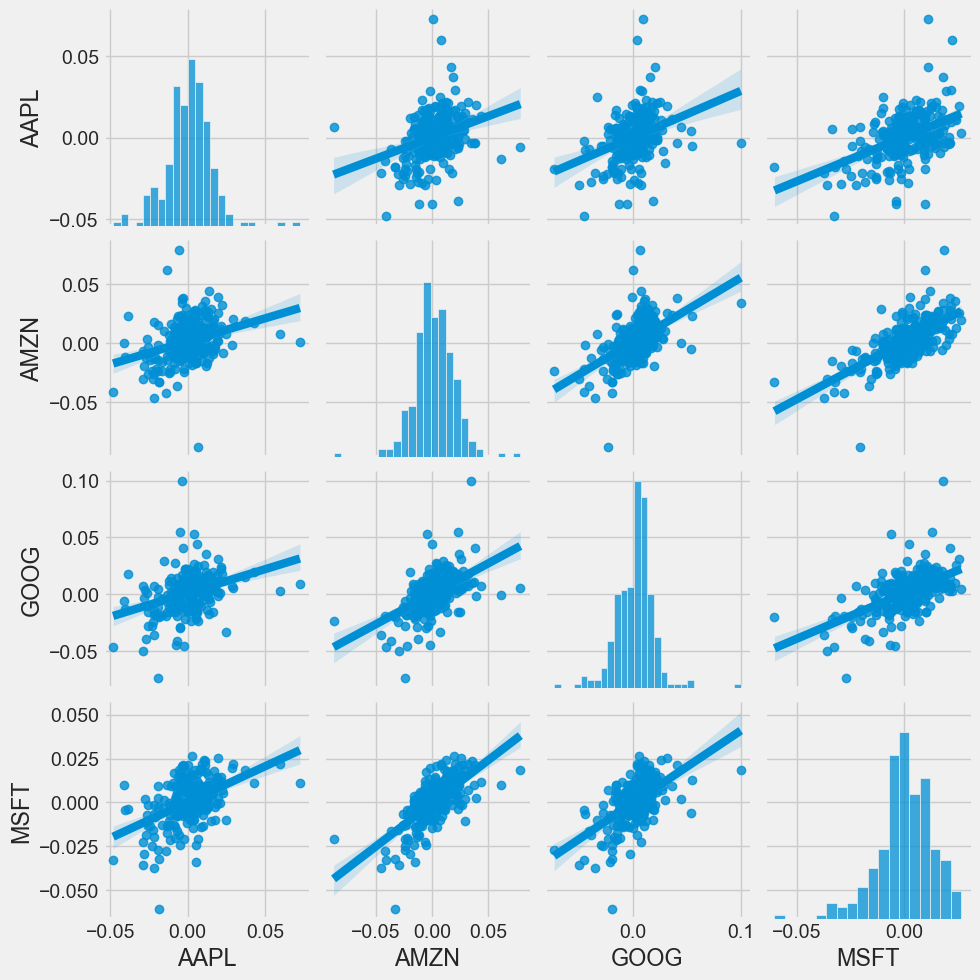

In [12]:
#cChecking corr between the companies
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

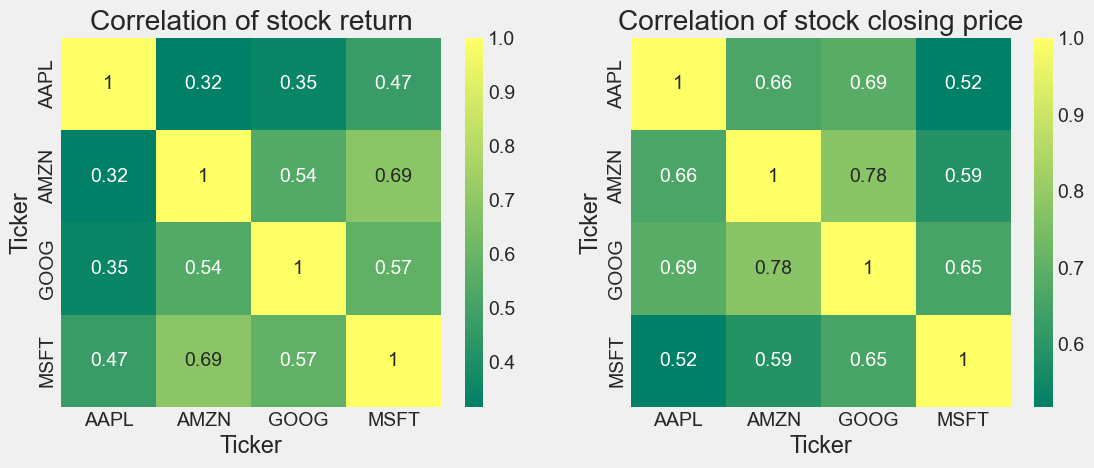

In [13]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

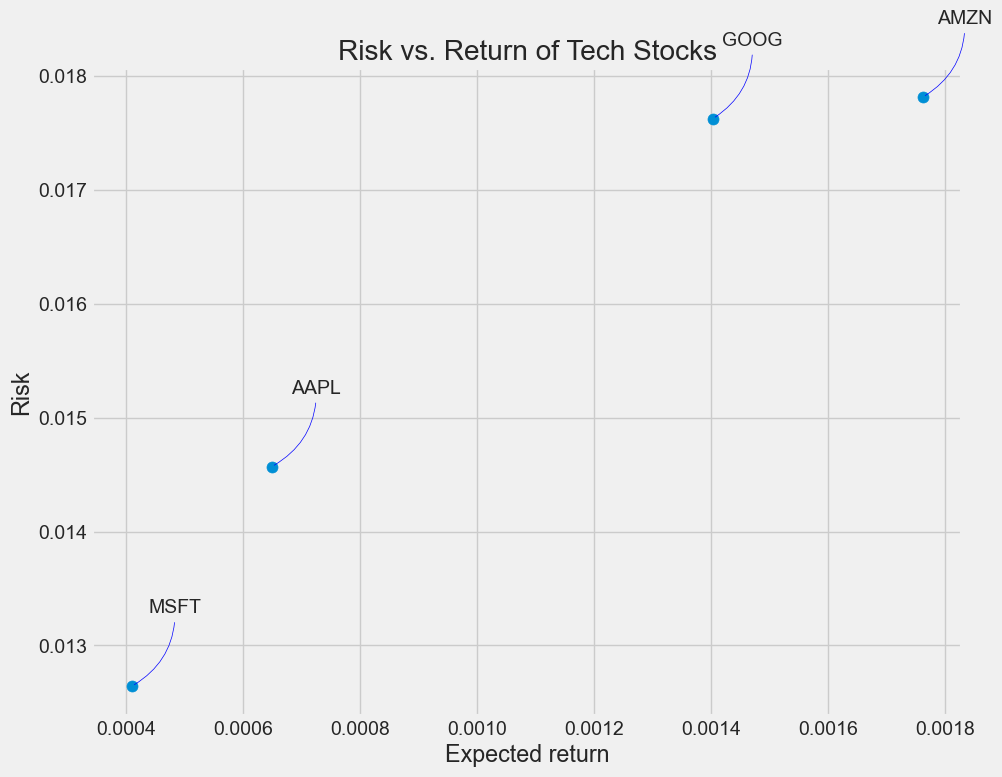

In [14]:
# Dropping any NaN values to ensure clean plotting
rets = tech_rets.dropna()

# Define the area for each scatter point
area = np.pi * 20  # All points will have the same size for simplicity

# Set up the figure
plt.figure(figsize=(10, 8))

# Create scatter plot
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Loop through the columns and add annotations
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(50, 50),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.title('Risk vs. Return of Tech Stocks')
plt.grid(True)  # Adding a grid for better readability
plt.show()

In [15]:
#Predicting Stock Price of Google
# Get the stock quote
# Get the stock quote for Google
df = yf.download('GOOG', start='2012-01-01', end=datetime.now())

# Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...
2025-01-14,191.050003,193.270004,189.639999,192.500000,13651200
2025-01-15,196.979996,197.800003,193.330002,194.350006,12894900


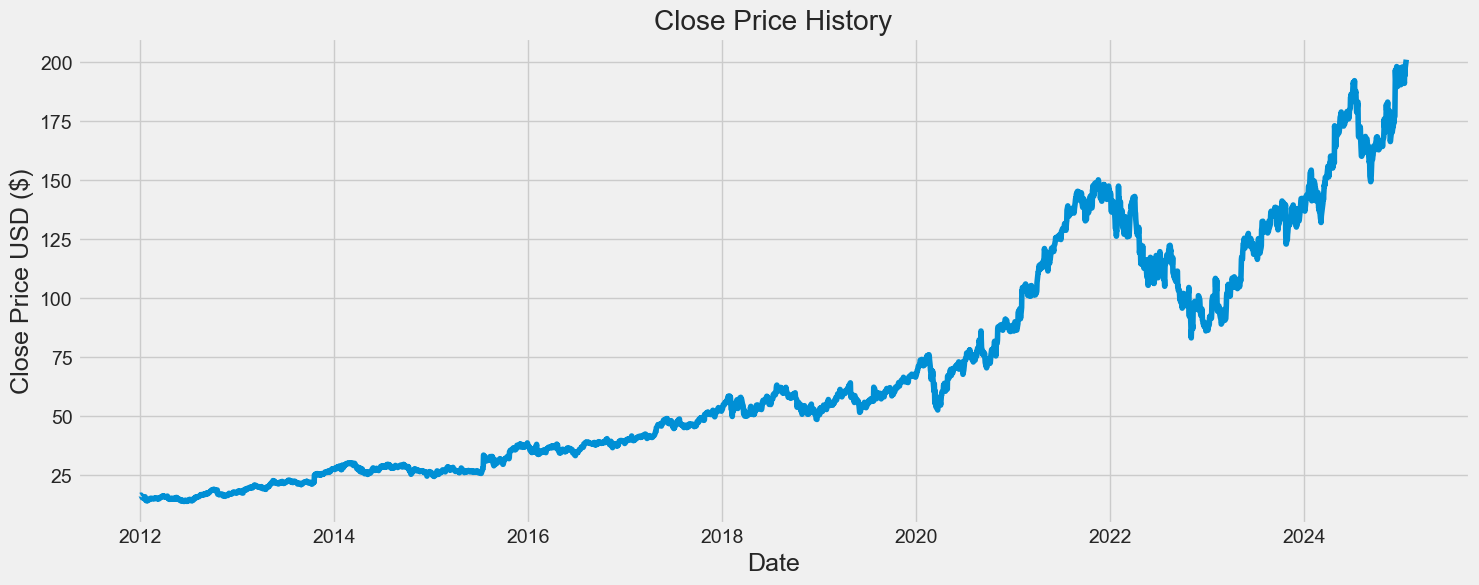

In [16]:
# Plotting the close price history
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
# Create a new DataFrame with only the 'Close' column
data = df[['Close']]

# Convert the DataFrame to a numpy array
dataset = data.values

# Get the number of rows to train the model on (95% of the dataset)
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Print scaled data to check results
print("First few scaled data points:", scaled_data[:5])


First few scaled data points: [[0.01409992]
 [0.01448039]
 [0.01325149]
 [0.0120597 ]
 [0.00840613]]


In [18]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3118

In [19]:
# Create the training dataset with the scaled data
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

# Generate the sequences for training
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Get the past 60 days' data
    y_train.append(train_data[i, 0])       # Target value to be predicted

    # Print the first two sequences and their corresponding targets
    if i <= 61:
        print("X_train sample:", x_train[-1])
        print("Y_train sample:", y_train[-1])
        print()

# Convert the x_train and y_train to numpy arrays for modeling
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to fit the LSTM input shape: [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Print the shape of x_train to confirm the correct reshaping
print("Shape of x_train:", x_train.shape)

X_train sample: [0.01409992 0.01448039 0.01325149 0.0120597  0.00840613 0.00849628
 0.00887012 0.00935797 0.00874152 0.00921744 0.00979147 0.01067436
 0.00357137 0.00350907 0.00290059 0.00138402 0.00119974 0.00277464
 0.00247107 0.00279188 0.00288733 0.00345472 0.00494213 0.0066337
 0.00632614 0.00673445 0.00694788 0.00621213 0.00704598 0.00672251
 0.00616573 0.006293   0.00604377 0.0072846  0.00648124 0.00623865
 0.00674108 0.00666286 0.00786658 0.00784802 0.00839818 0.00824573
 0.00731775 0.00608619 0.00633012 0.00637519 0.0054618  0.00611138
 0.00778571 0.00754842 0.00822982 0.00874816 0.00993331 0.00986835
 0.01072872 0.0115334  0.01107472 0.01196822 0.011662   0.01282064]
Y_train sample: 0.011846270441143197

X_train sample: [0.01448039 0.01325149 0.0120597  0.00840613 0.00849628 0.00887012
 0.00935797 0.00874152 0.00921744 0.00979147 0.01067436 0.00357137
 0.00350907 0.00290059 0.00138402 0.00119974 0.00277464 0.00247107
 0.00279188 0.00288733 0.00345472 0.00494213 0.0066337  0.0

In [20]:
import tensorflow as tf
import numpy as np
import os

# Force CPU mode to avoid GPU errors
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Load x_train and y_train (make sure these are preprocessed)
# Example: x_train = np.load("x_train.npy")

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(60, 1)),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(x_train, y_train, batch_size=16, epochs=5)

# Save model
model.save("stock_lstm_model.h5")



Epoch 1/5


/Users/alokjp/miniforge3/envs/lstm_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-01-21 19:08:21.661274: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0076
Epoch 2/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 3.3357e-04
Epoch 3/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.9105e-04
Epoch 4/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4.0565e-04
Epoch 5/5
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.8433e-04


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


5.503372901756183

/var/folders/4n/ty802yfx4y1dnq_5pjzwlhgc0000gn/T/ipykernel_1917/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


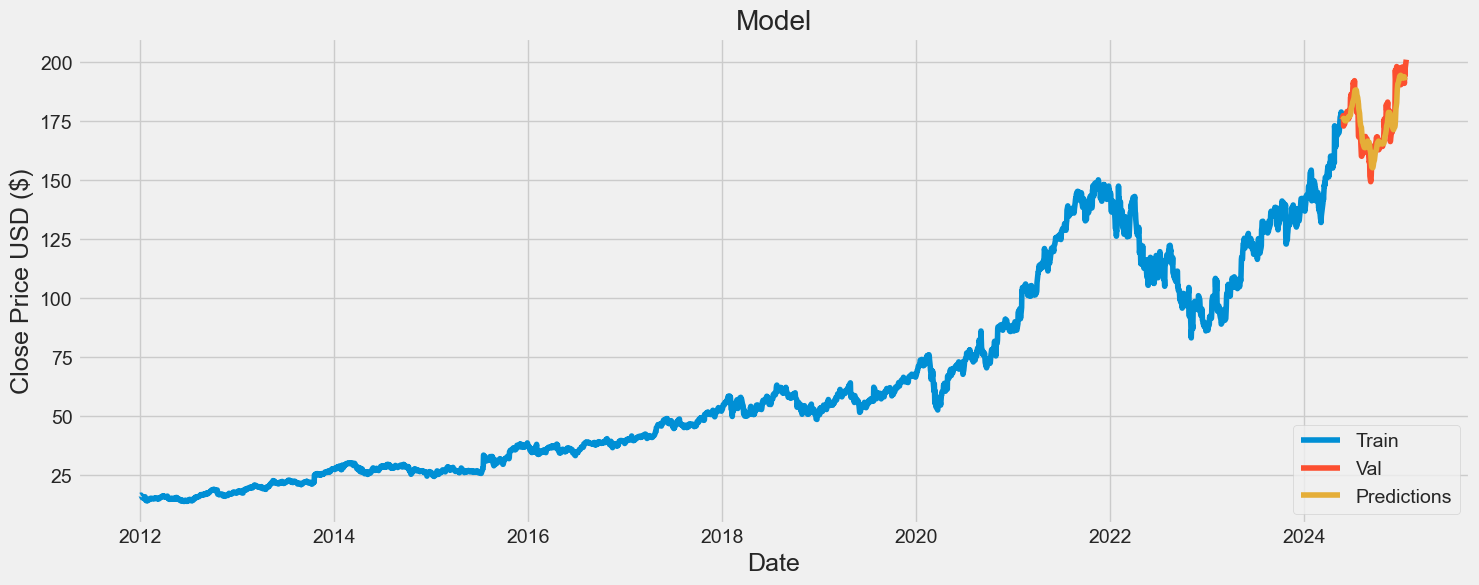

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
valid

Price,Close,Predictions
Ticker,GOOG,
Date,,
2024-05-24,175.698715,175.283798
2024-05-28,177.382645,175.617981
2024-05-29,176.764862,175.965836
2024-05-30,172.938614,176.219666
2024-05-31,173.337189,176.080811
...,...,...
2025-01-14,191.050003,193.720840
2025-01-15,196.979996,193.374374


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))  
scaled_data = scaler.fit_transform(dataset)  # Normalize data for better training

# Split data into training and testing sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 60:]  # Use last 60 days for testing

# Create x_train and y_train
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  
    y_train.append(train_data[i, 0])  

x_train, y_train = np.array(x_train), np.array(y_train)

# Create x_test and y_test
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test, y_test = np.array(x_test), dataset[training_data_len:, 0]  # Unscaled actual values


In [26]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [27]:
# Predict stock prices
predictions = model.predict(x_test)

# Rescale predictions back to original scale
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Linear Regression RMSE: {rmse:.4f}")


Linear Regression RMSE: 2.6967


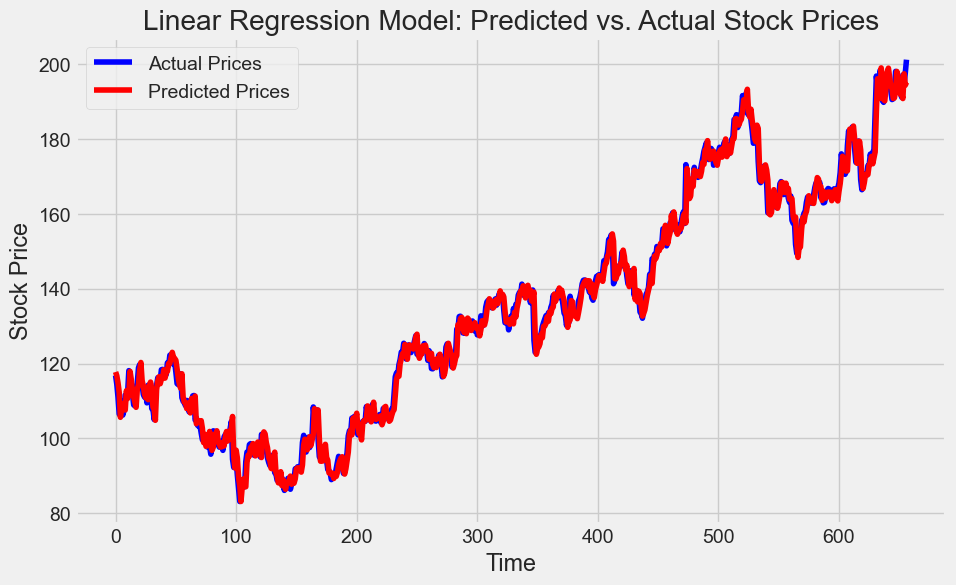

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Linear Regression Model: Predicted vs. Actual Stock Prices")
plt.legend()
plt.show()
